In [ ]:
import pandas as pd

file_path = 'C:/Users/Nitro/Documents/Kuliah/Machine Learning/UTS/titanic/train.csv'
data = pd.read_csv(file_path)

print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

imputer = SimpleImputer(strategy='most_frequent')  
data['Age'] = imputer.fit_transform(data[['Age']])  

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])  
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])  

data = pd.get_dummies(data, columns=['Cabin'], drop_first=True)

X = data[['Age', 'Sex', 'Embarked']] 
y = data['Survived'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Implementasikan logistic regression, kNN, dan SVM untuk memprediksi
kelangsungan hidup penumpang.

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print()

Logistic Regression:
Accuracy: 0.7821
Precision: 0.7536
Recall: 0.7027
F1-Score: 0.7273
Confusion Matrix:
[[88 17]
 [22 52]]



In [33]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

print("k-Nearest Neighbors (kNN):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print()


k-Nearest Neighbors (kNN):
Accuracy: 0.7654
Precision: 0.7222
Recall: 0.7027
F1-Score: 0.7123
Confusion Matrix:
[[85 20]
 [22 52]]



In [34]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')
model_svm.fit(X_train_scaled, y_train)

y_pred_svm = model_svm.predict(X_test_scaled)

print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print()


Support Vector Machine (SVM):
Accuracy: 0.7821
Precision: 0.7536
Recall: 0.7027
F1-Score: 0.7273
Confusion Matrix:
[[88 17]
 [22 52]]



Confusion Matrix

Confusion Matrix:
[[4 1]
 [2 3]]


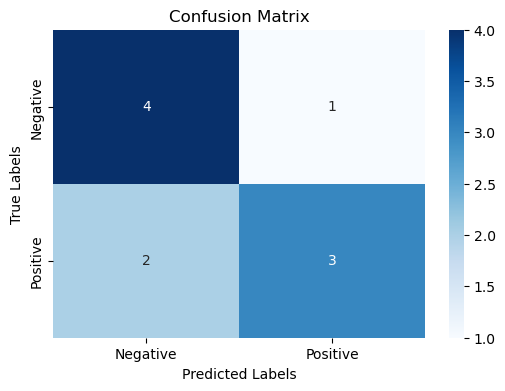

In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0] 
y_pred = [0, 0, 1, 0, 1, 0, 1, 0, 0, 1]  

cm = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
